# Python Final Project
### Nitish Ghosal
### M12522228

## Objective : Predicting Employee Attrition Using Machine Learning

## Data Description 
The dataset consists of 25491 obseravtions and 10 variables. Each row in dataset represents an employee; each column contains employee attributes:

* satisfaction_level (0–1)
* last_evaluation (Time since last evaluation in years)
* number_projects (Number of projects completed while at work)
* average_monthly_hours (Average monthly hours at workplace)
* time_spend_company (Time spent at the company in years)
* Work_accident (Whether the employee had a workplace accident)
* left (Whether the employee left the workplace or not (1 or 0))
* promotion_last_5years (Whether the employee was promoted in the last five years)
* sales (Department in which they work for)
* salary (Relative level of salary)



## Approach
We perform turnover analysis project by using Python’s Scikit-Learn library. We use Logistic Regression, Random Forest, and Support Vector Machine as classifier for employee attrition and measure the accuracy of models that are built.

### Step 1 : Data Import and Preprocessing

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys,traceback


In [2]:
'''Function to load the dataset'''
def data_init(data_filepath):
    try:
        hr = pd.read_csv(data_filepath,low_memory= False)

        col_list = list(hr)

        print("Loaded successfully.")
    
        return hr
    except:
        print("File Could not be loaded")
        print("Check your file or filepathname")
        return False


In [3]:
'''User interacive way to access the dataset'''
c = 1
while (c!=0):
    data_filepath = str(input("Enter data filepath:"))
    if os.path.isfile(data_filepath) :
        hr_data = data_init(data_filepath)
    else:
        '''Add double slash in filepath and try again!'''
        data_filepath = re.escape(data_filepath)
        hr_data = data_init(data_filepath)
    if type(hr_data) != str: c = 0
    else: print ("Check if file exists in the filepath and Let's try again ! \n")

Enter data filepath:C:\Users\nitis\Desktop\MS-BANA-Orientation-master\MS-BANA-Orientation-master\Day 1\employee-attrition\train.csv
Loaded successfully.


In [4]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,3.8,5.3,3,167,3,0,1,0,sales,low
1,8.0,8.6,6,272,6,0,1,0,sales,medium
2,1.1,8.8,8,282,4,0,1,0,sales,medium
3,3.7,5.2,3,169,3,0,1,0,sales,low
4,4.1,5.0,3,163,3,0,1,0,sales,low


In [5]:
#Rename 'sales' column to department 
hr=hr.rename(columns = {'sales':'department'})
#Display data type for each column
hr.dtypes


satisfaction_level        float64
last_evaluation_rating    float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
department                 object
salary                     object
dtype: object

In [6]:
#Check for Missing Values
hr.isnull().any()


satisfaction_level        False
last_evaluation_rating    False
number_project            False
average_montly_hours      False
time_spend_company        False
Work_accident             False
left                      False
promotion_last_5years     False
department                False
salary                    False
dtype: bool

The “left” column is the outcome variable recording 1 and 0. 1 for employees who left the company and 0 for those who didn’t.

In [7]:
#Dimensions of our dataset
hr.shape


(25491, 10)

In [8]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.234985,0.021419
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.423998,0.144780
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

In [9]:
#To get the unique values for department
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine “technical”, “support” and “IT” these three together and call them “technical”.

In [10]:
#Combine "technical","support" and "IT" into one department
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

After the change, this is how the department categories look:

In [11]:
#Print the updated values of departments
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# Data Exploration

Let us find out the number of employees who left the company and those who didn’t:

In [12]:
hr['left'].value_counts()

0    19501
1     5990
Name: left, dtype: int64

We observe that 5990 employees left the company, which is 23.4 per cent of the total employees in the organisation.

In [13]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


Several observations:
* The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
* The average monthly work hours of employees who left the company is more than that of the employees who stayed.
* The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
* The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [14]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.153558,0.034457
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.265957,0.018237
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.283902,0.021412
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.134958,0.111528
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.229553,0.050172
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.218626,0.000000
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.240212,0.023519
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.245317,0.008798


In [15]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.066792,0.060207
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.291945,0.008385
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.203156,0.028644


## Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

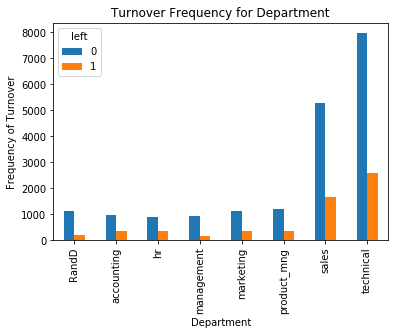

In [16]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

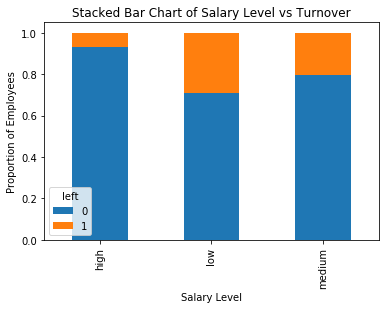

In [17]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

In [18]:
#Proportion of employees left by department
pd.crosstab(hr.department, hr.left)

left,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


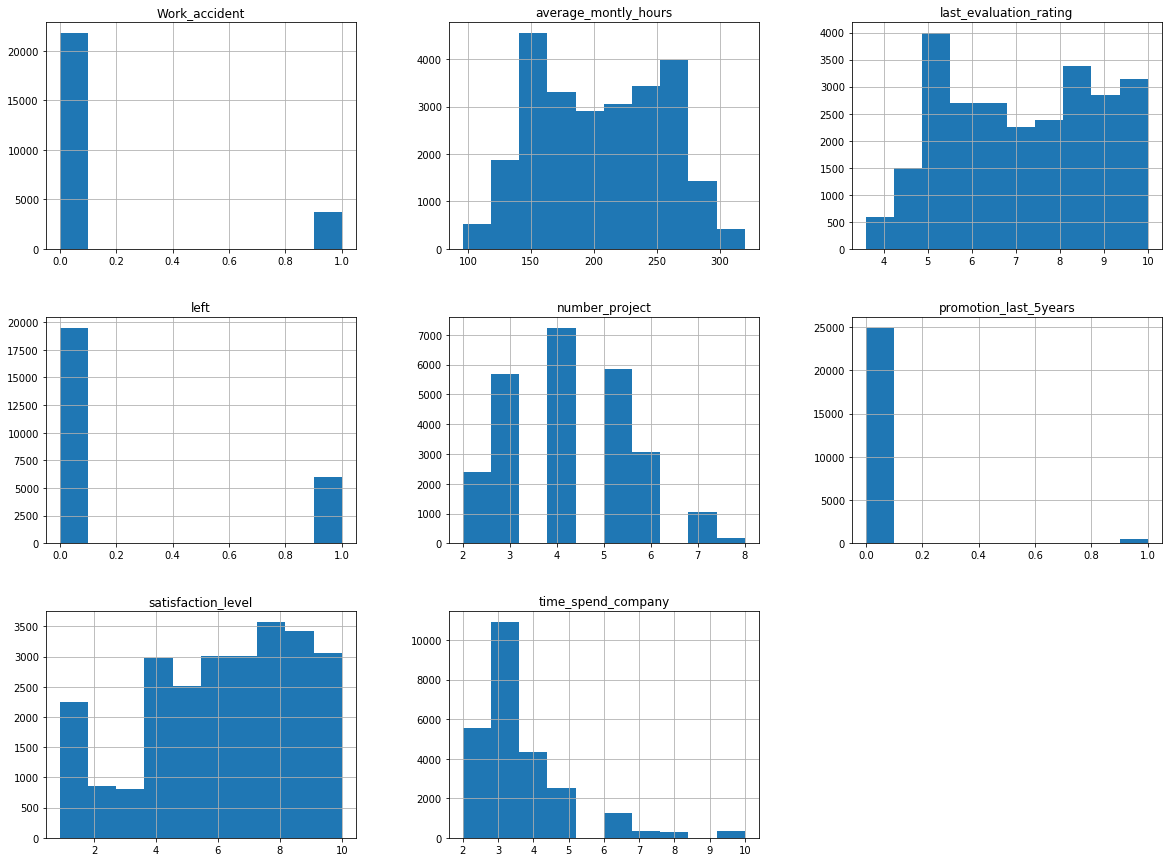

In [19]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

## Create Dummy Variable for Categorical Variable

There are two categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [20]:
hr.head()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,3.8,5.3,3,167,3,0,1,0,sales,low
1,8.0,8.6,6,272,6,0,1,0,sales,medium
2,1.1,8.8,8,282,4,0,1,0,sales,medium
3,3.7,5.2,3,169,3,0,1,0,sales,low
4,4.1,5.0,3,163,3,0,1,0,sales,low


In [21]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

We drop the actual categorical variables once the dummy variables have been created.

In [22]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

Column names after creating dummy variables for categorical variables:

In [23]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [24]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

The response variable is “left”, and all the other variables are predictors.

In [25]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

## Feature Selection

The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

Let’s use feature selection to help us decide which variables are significant that can predict employee turnover with great accuracy. There are total 18 columns in X, we will select 10 initially.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive Feature Elimination (RFE)
model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 7 2 9 1 1 1 1 3 1 1 5 8 6 4 1 1 1]


We can see that RFE chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array.

In [181]:

cols=['satisfaction_level', 'last_evaluation_rating', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

### Logistic Regression Model

In [182]:
#Split data into training and test samples
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [183]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.767


### Random Forest

In [185]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.989


### Support Vector Machine

In [187]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [188]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.960


Out of the three models, Random Forest has the best performance. We will perform 10-fold cross validation to confirm our results.

### 10 Fold Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest and SVM  model.

In [189]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.988


In [190]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for SVM Classifier: 0.959


From the CV results we observe that the average accuracy remains very close to the Random Forest & SVM  model accuracy; hence, we can conclude that the models generalize well.

### Precision and Recall

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [191]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5840
          1       0.98      0.98      0.98      1808

avg / total       0.99      0.99      0.99      7648



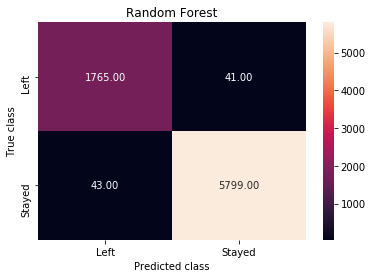

In [192]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [193]:
#PRScores for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.80      0.92      0.86      5840
          1       0.51      0.26      0.34      1808

avg / total       0.73      0.77      0.74      7648



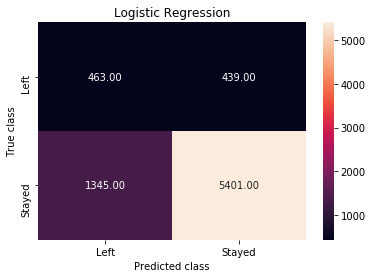

In [194]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [195]:
#PR scores for SVM
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      5840
          1       0.92      0.91      0.92      1808

avg / total       0.96      0.96      0.96      7648



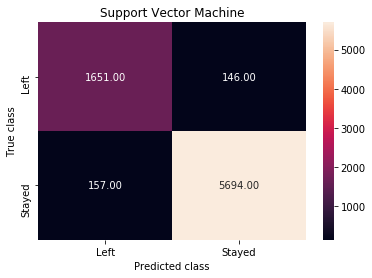

In [196]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

When an employee left, how often does the classifier predict that correctly? This measurement is called "recall" and a quick look at these diagrams can demonstrate that random forest is clearly best for this criteria. Out of all the turnover cases, random forest correctly retrieved 1764 out of 1808. This translates to a turnover "recall" of about 97.5% (1764/1808), far better than logistic regression (25.6%) or support vector machines (91.3%).

When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called "precision". Random forest again out preforms the other two at about 97.6% precision (1764 out of 1807) with logistic regression at about 51.3% (463 out of 902), and support vector machine at about 91.8% (1651 out of 1797).

## ROC Curve

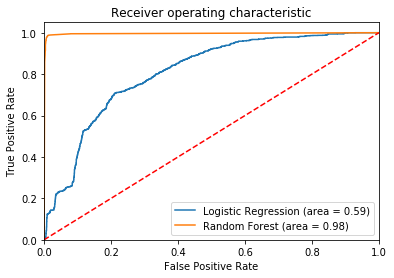

In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for logistic regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

### Variable Imporatnce for Random Forest Classifier

According to our Random Forest model, the  the most important features which influence whether to leave the company, in ascending order are as follows:

In [208]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    analysis_result += ('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


promotion_last_5years-0.17%
department_management-0.21%
department_RandD-0.24%
department_hr-0.27%
salary_high-0.70%
salary_low-1.00%
Work_accident-1.57%
last_evaluation-18.04%
time_spend_company-27.72%
satisfaction_level-50.08%


In [210]:
file = open("variable_importance.txt","w+")
file.write(analysis_result)
file.close() 

## Results & Conclusion

Random Forest is the best classfier for predicting employee attrition for our dataset. Some of the most important factors on which employee attrition depends are 
* Satisfaction Level
* Tenure with organisation
* Time since last evaluation
* Work Accident
* Salary
* Department
* Career Advancement ( If Promoted in last five years or not)